# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data

In [2]:
imdb_title = pd.read_csv('Data/imdb.title.principals.csv.gz')
imdb_crew = pd.read_csv('Data/imdb.title.crew.csv.gz')
rating = pd.read_csv('Data/imdb.title.ratings.csv.gz')

# nate's 3 dfs
title_basics_imdb = pd.read_csv('Data/imdb.title.basics.csv.gz')
akas_imdb = pd.read_csv('Data/imdb.title.akas.csv.gz')
name_basics_imdb = pd.read_csv('Data/imdb.name.basics.csv.gz')

# Nina's Data
tn_cleaned = pd.read_csv('Data/tn_cleaned.csv')
tndb_cleaned = pd.read_csv('Data/tmdb_cleaned.csv')
cleaned_bom = pd.read_csv('Data/cleaned_bom.csv')

# Cleaning the Data

In [3]:
akas_imdb.rename(columns = {'title_id':'tconst'}, inplace = True)

In [4]:
name_basics_imdb.drop(['death_year'], axis = 1, inplace=True)
name_basics_imdb.drop(['birth_year'], axis = 1, inplace=True)

### Making a universial title column

In [5]:
tn_cleaned['movie'] = tn_cleaned['movie'].apply(lambda x: x.lower())
tndb_cleaned['original_title'] = tndb_cleaned['original_title'].apply(lambda x: x.lower())
tndb_cleaned['title'] = tndb_cleaned['title'].apply(lambda x: x.lower())
cleaned_bom['title'] = cleaned_bom['title'].apply(lambda x: x.lower())
title_basics_imdb['primary_title'] = title_basics_imdb['primary_title'].apply(lambda x: x.lower())
akas_imdb['title'] = akas_imdb['title'].apply(lambda x: x.lower())

In [6]:
# Changing 'movie' to 'title'
tn_cleaned.rename(columns= {'movie' : 'title'}, inplace=True)

In [7]:
# Merging on 'nconst'
nconst_merge = imdb_title.merge(name_basics_imdb, on = 'nconst')
imdb_title.isna().sum()

tconst             0
ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64

In [8]:
# Looking at the missing data
nconst_merge.isna().sum()

tconst                     0
ordering                   0
nconst                     0
category                   0
job                   850228
characters            634741
primary_name               0
primary_profession     53646
known_for_titles       30467
dtype: int64

In [9]:
# Dropping missing 'nconst' data
nconst_merge.dropna(subset = ['nconst'], inplace = True)
nconst_merge.isna().sum()

tconst                     0
ordering                   0
nconst                     0
category                   0
job                   850228
characters            634741
primary_name               0
primary_profession     53646
known_for_titles       30467
dtype: int64

In [10]:
nconst_merge

,tconst,ordering,nconst,category,job,characters,primary_name,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
...,...,...,...,...,...,...,...,...,...
1027907,tt9689618,3,nm10439724,actor,NaN,NaN,Phillippe Warner,NaN,NaN
1027908,tt9689618,5,nm10439725,director,NaN,NaN,Xavi Herrero,"director,writer,cinematographer",tt9689618
1027909,tt9692684,3,nm10441594,director,NaN,NaN,Guy Jones,director,NaN
1027910,tt9692684,4,nm6009913,writer,writer,NaN,Sabrina Mahfouz,writer,"tt5191128,tt3254170,tt2319282,tt8452302"


# Merging all the data from imdb together on `tconst`

In [11]:
merged_data = nconst_merge.merge(imdb_crew, on = 'tconst').merge(rating, on = 'tconst').merge(title_basics_imdb, on = 'tconst').merge(akas_imdb, on = 'tconst')
merged_data

,tconst,ordering_x,nconst,category,job,characters,primary_name,primary_profession,known_for_titles,directors,...,start_year,runtime_minutes,genres,ordering_y,title,region,language,types,attributes,is_original_title
0,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414",nm0398271,...,2015,NaN,Comedy,1,remembering nigel,AU,NaN,NaN,NaN,0.0
1,tt5573596,4,nm0000476,actress,NaN,NaN,Sally Kirkland,"actress,producer,miscellaneous","tt0315327,tt0092569,tt3216866,tt0102138",nm0398271,...,2015,NaN,Comedy,1,remembering nigel,AU,NaN,NaN,NaN,0.0
2,tt5573596,7,nm0001445,actor,NaN,NaN,Martin Landau,"actor,producer,miscellaneous","tt0096316,tt0097123,tt0109707,tt0053125",nm0398271,...,2015,NaN,Comedy,1,remembering nigel,AU,NaN,NaN,NaN,0.0
3,tt5573596,1,nm0000925,actor,NaN,NaN,Steven Berkoff,"actor,writer,director","tt0086034,tt0086960,tt1243957,tt0066921",nm0398271,...,2015,NaN,Comedy,1,remembering nigel,AU,NaN,NaN,NaN,0.0
4,tt5573596,3,nm0121007,actor,NaN,NaN,Eric Burdon,"soundtrack,actor,composer","tt1478964,tt0443706,tt0118749,tt1408253",nm0398271,...,2015,NaN,Comedy,1,remembering nigel,AU,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422861,tt7573790,7,nm9547216,self,NaN,"[""Himself""]",Rafal Zaremba,NaN,NaN,nm9232479,...,2018,64.0,Documentary,1,wszystko z nami w porządku,PL,NaN,NaN,NaN,0.0
2422862,tt7573790,7,nm9547216,self,NaN,"[""Himself""]",Rafal Zaremba,NaN,NaN,nm9232479,...,2018,64.0,Documentary,2,wszystko z nami w porzadku,NaN,NaN,original,NaN,1.0
2422863,tt7573790,7,nm9547216,self,NaN,"[""Himself""]",Rafal Zaremba,NaN,NaN,nm9232479,...,2018,64.0,Documentary,3,мы в порядке,RU,NaN,NaN,NaN,0.0
2422864,tt7573790,7,nm9547216,self,NaN,"[""Himself""]",Rafal Zaremba,NaN,NaN,nm9232479,...,2018,64.0,Documentary,4,we are alright,US,NaN,NaN,literal English title,0.0


# Merging Nina's Data with `imdb` on `title`

In [12]:
final_merge = merged_data.merge(tn_cleaned, on = 'title').merge(tndb_cleaned, on = 'title').merge(cleaned_bom, on = 'title')
final_merge

,tconst,ordering_x,nconst,category,job,characters,primary_name,primary_profession,known_for_titles,directors,...,original_title_y,popularity,release_date_y,vote_average,vote_count,genre_id,Unnamed: 0,studio,domestic_gross_y,year
0,tt1226229,3,nm0005253,actress,NaN,"[""Daphne Binks""]",Elisabeth Moss,"actress,producer,soundtrack","tt3993894,tt5834204,tt2756032,tt0172493",nm0831557,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,68,Uni.,61000000.0,2010
1,tt1226229,3,nm0005253,actress,NaN,"[""Daphne Binks""]",Elisabeth Moss,"actress,producer,soundtrack","tt3993894,tt5834204,tt2756032,tt0172493",nm0831557,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,68,Uni.,61000000.0,2010
2,tt1226229,10,nm1015867,composer,NaN,NaN,Lyle Workman,"composer,soundtrack,music_department","tt0829482,tt0405422,tt0800039,tt1068680",nm0831557,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,68,Uni.,61000000.0,2010
3,tt1226229,10,nm1015867,composer,NaN,NaN,Lyle Workman,"composer,soundtrack,music_department","tt0829482,tt0405422,tt0800039,tt1068680",nm0831557,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,68,Uni.,61000000.0,2010
4,tt1226229,1,nm1706767,actor,NaN,"[""Aaron Green""]",Jonah Hill,"actor,producer,writer","tt1232829,tt2294449,tt1210166,tt0993846",nm0831557,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,68,Uni.,61000000.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196664,tt4333662,8,nm6350347,producer,producer,NaN,Sarah Mosses,producer,"tt4150444,tt4333662,tt5241966",nm2162785,...,they will have to kill us first,0.600,2015-08-04,5.0,1,99.0,2747,BBC,7500.0,2016
196665,tt4333662,9,nm8202353,producer,producer,NaN,John Schwartz,producer,tt4333662,nm2162785,...,they will have to kill us first,0.600,2015-08-04,5.0,1,10402.0,2747,BBC,7500.0,2016
196666,tt4333662,9,nm8202353,producer,producer,NaN,John Schwartz,producer,tt4333662,nm2162785,...,they will have to kill us first,0.600,2015-08-04,5.0,1,99.0,2747,BBC,7500.0,2016
196667,tt4333662,9,nm8202353,producer,producer,NaN,John Schwartz,producer,tt4333662,nm2162785,...,they will have to kill us first,0.600,2015-08-04,5.0,1,10402.0,2747,BBC,7500.0,2016


## Restricting the data from `2015` to `2018`

In [13]:
# merged_data_cleaned = final_merge.loc[(final_merge['start_year'] >= 2015) & (final_merge['start_year'] <= 2018)]

In [14]:
# Looking to see the differnt regions
# merged_data_cleaned['region'].value_counts()

### Only looking at movies from the United States, `US`

In [15]:
only_us_merged = final_merge.loc[final_merge['region'] == 'US']
only_us_merged.head()

,tconst,ordering_x,nconst,category,job,characters,primary_name,primary_profession,known_for_titles,directors,...,original_title_y,popularity,release_date_y,vote_average,vote_count,genre_id,Unnamed: 0,studio,domestic_gross_y,year
1,tt1226229,3,nm0005253,actress,NaN,"[""Daphne Binks""]",Elisabeth Moss,"actress,producer,soundtrack","tt3993894,tt5834204,tt2756032,tt0172493",nm0831557,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,68,Uni.,61000000.0,2010
3,tt1226229,10,nm1015867,composer,NaN,NaN,Lyle Workman,"composer,soundtrack,music_department","tt0829482,tt0405422,tt0800039,tt1068680",nm0831557,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,68,Uni.,61000000.0,2010
5,tt1226229,1,nm1706767,actor,NaN,"[""Aaron Green""]",Jonah Hill,"actor,producer,writer","tt1232829,tt2294449,tt1210166,tt0993846",nm0831557,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,68,Uni.,61000000.0,2010
7,tt1226229,2,nm1258970,actor,NaN,"[""Aldous Snow""]",Russell Brand,"actor,producer,writer","tt1334512,tt1336608,tt1226229,tt0800039",nm0831557,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,68,Uni.,61000000.0,2010
9,tt1226229,4,nm0126284,actress,NaN,"[""Jackie Q""]",Rose Byrne,"actress,soundtrack,producer","tt1591095,tt2004420,tt3079380,tt1478338",nm0831557,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,68,Uni.,61000000.0,2010


## All the columns, we can drop what we don't need

In [16]:
only_us_merged.columns

Index(['tconst', 'ordering_x', 'nconst', 'category', 'job', 'characters',
       'primary_name', 'primary_profession', 'known_for_titles', 'directors',
       'writers', 'averagerating', 'numvotes', 'primary_title',
       'original_title_x', 'start_year', 'runtime_minutes', 'genres',
       'ordering_y', 'title', 'region', 'language', 'types', 'attributes',
       'is_original_title', 'Unnamed: 0_x', 'id_x', 'release_date_x',
       'production_budget', 'domestic_gross_x', 'worldwide_gross',
       'release_month', 'release_day', 'release_year', 'Unnamed: 0_y',
       'genre_ids', 'id_y', 'original_language', 'original_title_y',
       'popularity', 'release_date_y', 'vote_average', 'vote_count',
       'genre_id', 'Unnamed: 0', 'studio', 'domestic_gross_y', 'year'],
      dtype='object')

### Making sure only english movies are counted

In [17]:
only_us_merged['language'].value_counts()

en    1370
Name: language, dtype: int64

## To drop

In [18]:
to_drop = ['job', 'characters', 'language', 'types', 'attributes'
           ,'is_original_title' , 'Unnamed: 0_x', 'id_x', 'id_y'
           , 'domestic_gross_y', 'Unnamed: 0', 'Unnamed: 0_y'
           ,'original_title_y']

only_us_merged.drop(labels = to_drop, axis = 1, inplace= True)

C:\Users\Manav\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
only_us_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34691 entries, 1 to 196628
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tconst              34691 non-null  object 
 1   ordering_x          34691 non-null  int64  
 2   nconst              34691 non-null  object 
 3   category            34691 non-null  object 
 4   primary_name        34691 non-null  object 
 5   primary_profession  34598 non-null  object 
 6   known_for_titles    34644 non-null  object 
 7   directors           34623 non-null  object 
 8   writers             34379 non-null  object 
 9   averagerating       34691 non-null  float64
 10  numvotes            34691 non-null  int64  
 11  primary_title       34691 non-null  object 
 12  original_title_x    34691 non-null  object 
 13  start_year          34691 non-null  int64  
 14  runtime_minutes     34378 non-null  float64
 15  genres              34691 non-null  object 
 16  ord

In [23]:
only_us_merged['Domestic Net Profit'] = only_us_merged['domestic_gross_x'] - only_us_merged['production_budget']
only_us_merged['Worldwide Net Profit'] = only_us_merged['worldwide_gross'] - only_us_merged['production_budget']
only_us_merged.head(5)

<ipython-input-23-669bcba8014c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_us_merged['Domestic Net Profit'] = only_us_merged['domestic_gross_x'] - only_us_merged['production_budget']
<ipython-input-23-669bcba8014c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_us_merged['Worldwide Net Profit'] = only_us_merged['worldwide_gross'] - only_us_merged['production_budget']


,tconst,ordering_x,nconst,category,primary_name,primary_profession,known_for_titles,directors,writers,averagerating,...,original_title_y,popularity,release_date_y,vote_average,vote_count,genre_id,studio,year,Domestic Net Profit,Worldwide Net Profit
1,tt1226229,3,nm0005253,actress,Elisabeth Moss,"actress,producer,soundtrack","tt3993894,tt5834204,tt2756032,tt0172493",nm0831557,"nm0831557,nm0781981",6.4,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,Uni.,2010,21153526,51455875
3,tt1226229,10,nm1015867,composer,Lyle Workman,"composer,soundtrack,music_department","tt0829482,tt0405422,tt0800039,tt1068680",nm0831557,"nm0831557,nm0781981",6.4,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,Uni.,2010,21153526,51455875
5,tt1226229,1,nm1706767,actor,Jonah Hill,"actor,producer,writer","tt1232829,tt2294449,tt1210166,tt0993846",nm0831557,"nm0831557,nm0781981",6.4,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,Uni.,2010,21153526,51455875
7,tt1226229,2,nm1258970,actor,Russell Brand,"actor,producer,writer","tt1334512,tt1336608,tt1226229,tt0800039",nm0831557,"nm0831557,nm0781981",6.4,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,Uni.,2010,21153526,51455875
9,tt1226229,4,nm0126284,actress,Rose Byrne,"actress,soundtrack,producer","tt1591095,tt2004420,tt3079380,tt1478338",nm0831557,"nm0831557,nm0781981",6.4,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,Uni.,2010,21153526,51455875


## Can include only looking at movies with an average rating of > 8  
## and votes > 500

In [ ]:
# good_films = only_us_merged[(only_us_merged['averagerating'] > 8) & (only_us_merged['numvotes'] > 500)]
# good_films.head(2)

In [ ]:
# only_us_merged['year'].value_counts().sort_values

### Basic plots, not really relevant at the moment

In [ ]:
# fig, ax = plt.subplots(figsize = (15,5))

# x = good_films.groupby('genres').averagerating.mean().sort_values(ascending = False)[:10].index
# y = good_films.groupby('genres').averagerating.mean().sort_values(ascending = False)[:10].values

# ax.bar(x,y)

# ax.set_xlabel('Genre')
# ax.set_ylabel('Average Rating of Genre(s)')
# ax.set_title('Genre vs Rating')
# ax.set_xticklabels(x, rotation = 90);

In [ ]:
# good_films.sample(5)

In [ ]:
# directors = good_films[good_films['category'] == 'director']
# directors.head()

In [ ]:
# fig, ax = plt.subplots(figsize = (15,5))

# x = directors.groupby('primary_name').averagerating.mean().sort_values(ascending = False)[:20].index
# y = directors.groupby('primary_name').averagerating.mean().sort_values(ascending = False)[:20].values

# ax.bar(x,y)
# ax.set_xlabel('Director Name')
# ax.set_xticklabels(x, rotation = 90)
# ax.set_ylabel("Average Rating of Director's movies");

In [ ]:
only_us_merged.to_csv('Data/imdb_cleaned_final.csv', index = False)

In [ ]:
# fig, ax = plt.subplots(figsize = (15,5))

# x = good_films.groupby('genres').averagerating.mean().sort_values(ascending = False)[:10].index
# y = good_films.groupby('genres').averagerating.mean().sort_values(ascending = False)[:10].values

# ax.bar(x,y)

# ax.set_xlabel('Genre')
# ax.set_ylabel('Average Rating of Genre(s)')
# ax.set_title('Genre vs Rating')
# ax.set_xticklabels(x, rotation = 90);

<ipython-input-31-5dadb6d2625f>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 90);


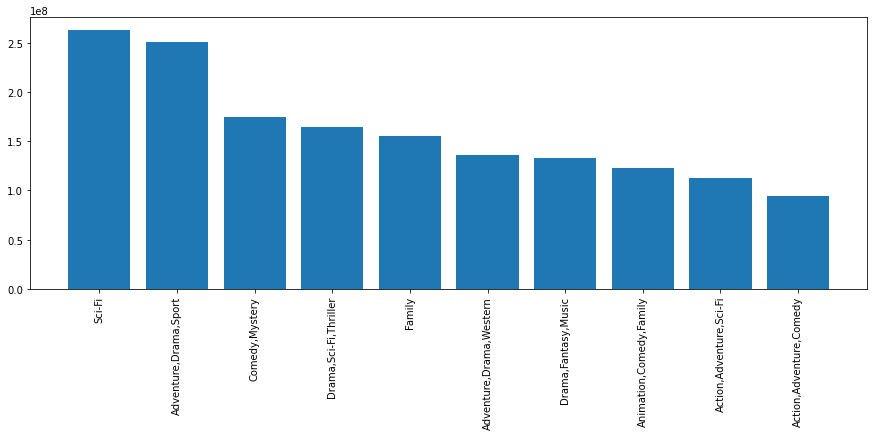

In [31]:
fig, ax = plt.subplots(figsize = (15,5))

x = only_us_merged.groupby('run time')['Domestic Net Profit'].mean().sort_values(ascending = False)[:10].index
y = only_us_merged.groupby('genres')['Domestic Net Profit'].mean().sort_values(ascending = False)[:10].values

ax.bar(x,y)
ax.set_xticklabels(x, rotation = 90);

In [32]:
only_us_merged.columns

Index(['tconst', 'ordering_x', 'nconst', 'category', 'primary_name',
       'primary_profession', 'known_for_titles', 'directors', 'writers',
       'averagerating', 'numvotes', 'primary_title', 'original_title_x',
       'start_year', 'runtime_minutes', 'genres', 'ordering_y', 'title',
       'region', 'release_date_x', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'release_month', 'release_day', 'release_year',
       'genre_ids', 'original_language', 'original_title_y', 'popularity',
       'release_date_y', 'vote_average', 'vote_count', 'genre_id', 'studio',
       'year', 'Domestic Net Profit', 'Worldwide Net Profit'],
      dtype='object')